# Stats Playground

This Jupyter Notebook serves as a stats playground to understand different kinds of experimental data, including categorical, ordinal, interval, and ratio data. It aims to help you learn which statistical test to use in different situations, such as when there is paired or unpaired data.

## Categorical Data

Categorical data refers to data that can be divided into distinct categories or groups. Examples of categorical data include gender (male/female), color (red/blue/green), and yes/no responses.

When working with categorical data, some common statistical tests include:

- Chi-square test: Used to determine if there is a significant association between two categorical variables.
- McNemar's test: Used to compare paired categorical data.

## Ordinal Data

Ordinal data refers to data that has a natural order or ranking. Examples of ordinal data include survey ratings (e.g., Likert scale), educational levels (e.g., high school, bachelor's degree, master's degree), and customer satisfaction ratings (e.g., very satisfied, satisfied, neutral, dissatisfied, very dissatisfied).

When working with ordinal data, some common statistical tests include:

- Mann-Whitney U test: Used to compare the medians of two independent groups.
- Wilcoxon signed-rank test: Used to compare the medians of two related groups.

## Interval Data

Interval data refers to data that is measured on a continuous scale with equal intervals between values. Examples of interval data include temperature (in Celsius or Fahrenheit), time (in minutes or seconds), and age (in years).

When working with interval data, some common statistical tests include:

- t-test: Used to compare the means of two independent groups.
- Paired t-test: Used to compare the means of two related groups.
- Analysis of Variance (ANOVA): Used to compare the means of more than two groups.

## Ratio Data

Ratio data is similar to interval data but has a meaningful zero point. Examples of ratio data include height (in centimeters), weight (in kilograms), and income (in dollars).

When working with ratio data, some common statistical tests include:

- t-test: Used to compare the means of two independent groups.
- Paired t-test: Used to compare the means of two related groups.
- Analysis of Variance (ANOVA): Used to compare the means of more than two groups.
- Pearson correlation: Used to measure the strength and direction of the linear relationship between two continuous variables.

Choosing the right statistical test depends on the type of data and the research question being investigated. It is important to consider the assumptions of each test and select the appropriate test accordingly.

By exploring different statistical tests in this stats playground, you can gain a better understanding of when to use each test and how to interpret the results.

Happy exploring and analyzing your experimental data!


## Categorical Data

In [32]:
import pandas as pd
import numpy as np

import numpy as np

n = 20  # sample size, must be even for equal split

# Create an array with n/2 'old_prototype' and n/2 'new_prototype'
group = np.array(['old_prototype'] * (n//2) + ['new_prototype'] * (n//2))

# Shuffle the array to randomize the order
np.random.shuffle(group)

# Generate "task_completed" values based on "group" values
task_completed = np.where(group == 'old_prototype', np.random.choice(['yes', 'no'], size=n, p=[0.1, 0.9]), np.random.choice(['yes', 'no'], size=n, p=[0.9, 0.1]))

# Create DataFrame
df = pd.DataFrame({'group': group, 'task_completed': task_completed})
print(df)


            group task_completed
0   new_prototype            yes
1   new_prototype            yes
2   old_prototype            yes
3   old_prototype             no
4   new_prototype            yes
5   new_prototype            yes
6   old_prototype             no
7   old_prototype             no
8   new_prototype            yes
9   old_prototype             no
10  new_prototype            yes
11  old_prototype            yes
12  new_prototype            yes
13  new_prototype            yes
14  new_prototype            yes
15  old_prototype             no
16  old_prototype             no
17  new_prototype            yes
18  old_prototype             no
19  old_prototype             no


#### Chi-squared test

In [33]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['group'], df['task_completed'])
print(contingency_table)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-square: {chi2}, p-value: {p}')

task_completed  no  yes
group                  
new_prototype    0   10
old_prototype    8    2
Chi-square: 10.208333333333332, p-value: 0.001398074641211553


#### McNemar's Test

In [34]:
from statsmodels.stats.contingency_tables import mcnemar

# Create a contingency table
contingency_table = pd.crosstab(df['group'], df['task_completed'])
print(contingency_table)

# Perform McNemar test
result = mcnemar(contingency_table)

print(f"McNemar statistic: {result.statistic}, p-value: {result.pvalue}")


task_completed  no  yes
group                  
new_prototype    0   10
old_prototype    8    2
McNemar statistic: 0.0, p-value: 1.0


## Ordinal Data

In [46]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon

n = 20  # sample size, must be even for equal split

# Create an array with n/2 'old_prototype' and n/2 'new_prototype'
group = np.array(['old_prototype'] * (n//2) + ['new_prototype'] * (n//2))

# Define the Likert questions
questions = ['I enjoy coming to work', 'I can see a long term future at this company', 'I can see opportunities to progress in this company']

# Define the answer options
answer_options = ['Strongly Disagree', 'Disagree', 'Agree', 'Strongly Agree']

# Create an empty dataframe
df = pd.DataFrame()

# Generate random answers for each participant
for i in range(20):
    participant_answers = [np.random.choice(answer_options) for _ in range(len(questions))]
    participant_group = group[i]
    participant_data = pd.DataFrame([participant_answers], columns=questions)
    participant_data['group'] = participant_group
    df = pd.concat([df, participant_data], ignore_index=True)

# Print the dummy dataset
print(df)

   I enjoy coming to work I can see a long term future at this company  \
0          Strongly Agree                                        Agree   
1          Strongly Agree                               Strongly Agree   
2                Disagree                               Strongly Agree   
3          Strongly Agree                               Strongly Agree   
4       Strongly Disagree                                     Disagree   
5       Strongly Disagree                               Strongly Agree   
6                Disagree                                        Agree   
7                   Agree                               Strongly Agree   
8                   Agree                               Strongly Agree   
9       Strongly Disagree                               Strongly Agree   
10      Strongly Disagree                            Strongly Disagree   
11                  Agree                               Strongly Agree   
12                  Agree             

#### Wilcoxon signed-rank test

In [48]:
import warnings

# Convert answer options to integers
answer_mapping = {'Strongly Disagree': 1, 'Disagree': 2, 'Agree': 3, 'Strongly Agree': 4}

# Convert answers to integers
df_int = df.replace(answer_mapping)

# Perform Wilcoxon test for each question and calculate median
for question in questions:
    old_group = df_int[df_int['group'] == 'old_prototype'][question]
    new_group = df_int[df_int['group'] == 'new_prototype'][question]
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        result = wilcoxon(old_group, new_group)
    median_old = old_group.median()
    median_new = new_group.median()
    print(f"Wilcoxon test for {question}: statistic={result.statistic}, p-value={result.pvalue}, median (old group)={median_old}, median (new group)={median_new}")

Wilcoxon test for I enjoy coming to work: statistic=22.0, p-value=0.9521317232884507, median (old group)=2.5, median (new group)=3.0
Wilcoxon test for I can see a long term future at this company: statistic=0.0, p-value=0.009747807101173898, median (old group)=4.0, median (new group)=2.5
Wilcoxon test for I can see opportunities to progress in this company: statistic=7.5, p-value=0.13460465781116093, median (old group)=3.0, median (new group)=1.5


#### Mann-Whitney U test

In [37]:
from scipy.stats import mannwhitneyu

# Convert answer options to integers
answer_mapping = {'Strongly Disagree': 1, 'Disagree': 2, 'Agree': 3, 'Strongly Agree': 4}

# Convert answers to integers
df_int = df.replace(answer_mapping)

# Perform Mann-Whitney U test for each question and calculate median
for question in questions:
    old_group = df_int[df_int['group'] == 'old_prototype'][question]
    new_group = df_int[df_int['group'] == 'new_prototype'][question]
    result = mannwhitneyu(old_group, new_group)
    median_old = old_group.median()
    median_new = new_group.median()
    print(f"Mann-Whitney U test for {question}: statistic={result.statistic}, p-value={result.pvalue}, median (old group)={median_old}, median (new group)={median_new}")


Mann-Whitney U test for I enjoy coming to work: statistic=31.5, p-value=0.15506801868037853, median (old group)=2.5, median (new group)=3.0
Mann-Whitney U test for I can see a long term future at this company: statistic=36.0, p-value=0.28762738195501514, median (old group)=2.0, median (new group)=3.0
Mann-Whitney U test for I can see opportunities to progress in this company: statistic=55.0, p-value=0.7239744542152693, median (old group)=3.0, median (new group)=2.5


## Interval & Ratio Data

In [38]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon
from scipy.stats import shapiro
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

n = 20  # sample size, must be even for equal split

# Create an array with n/2 'old_prototype' and n/2 'new_prototype'
group = np.array(['old_prototype'] * (n//2) + ['new_prototype'] * (n//2))

# Generate task completion time with a significant difference between the two groups
old_group_completion_time = np.random.randint(90, 121, size=n//2)  # Higher completion time for old_prototype group
new_group_completion_time = np.random.randint(30, 61, size=n//2)  # Lower completion time for new_prototype group

# Combine the completion times for both groups
task_completion_time = np.concatenate((old_group_completion_time, new_group_completion_time))

# Create DataFrame
df = pd.DataFrame({'group': group, 'task_completion_time': task_completion_time})
print(df)


            group  task_completion_time
0   old_prototype                    90
1   old_prototype                   116
2   old_prototype                   101
3   old_prototype                    99
4   old_prototype                   113
5   old_prototype                   105
6   old_prototype                   116
7   old_prototype                   113
8   old_prototype                   106
9   old_prototype                   120
10  new_prototype                    60
11  new_prototype                    56
12  new_prototype                    40
13  new_prototype                    40
14  new_prototype                    51
15  new_prototype                    48
16  new_prototype                    56
17  new_prototype                    35
18  new_prototype                    59
19  new_prototype                    55


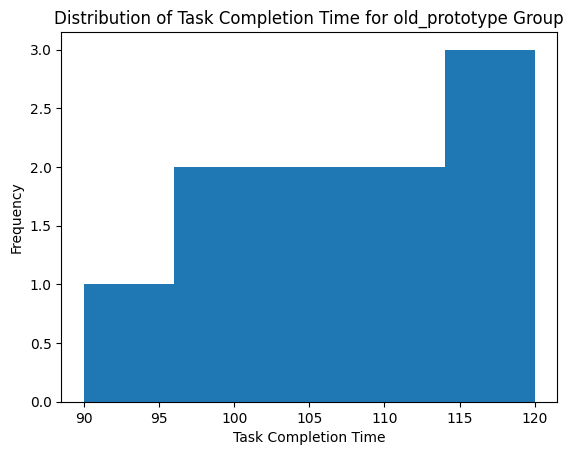

Shapiro-Wilk test statistic for old_prototype group: 0.9434830546379089, p-value: 0.5923795700073242


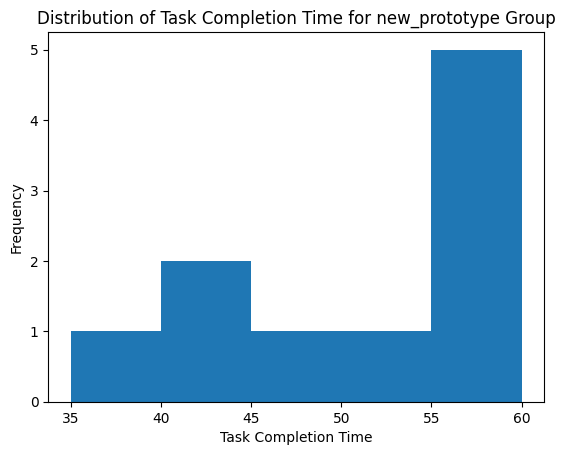

Shapiro-Wilk test statistic for new_prototype group: 0.8944993615150452, p-value: 0.1904485672712326


In [39]:
# Plot histogram for old_prototype group
plt.hist(df[df['group'] == 'old_prototype']['task_completion_time'], bins='auto')
plt.xlabel('Task Completion Time')
plt.ylabel('Frequency')
plt.title('Distribution of Task Completion Time for old_prototype Group')
plt.show()

# Perform Shapiro-Wilk test for old_prototype group
stat, p = shapiro(df[df['group'] == 'old_prototype']['task_completion_time'])
print(f"Shapiro-Wilk test statistic for old_prototype group: {stat}, p-value: {p}")

# Plot histogram for new_prototype group
plt.hist(df[df['group'] == 'new_prototype']['task_completion_time'], bins='auto')
plt.xlabel('Task Completion Time')
plt.ylabel('Frequency')
plt.title('Distribution of Task Completion Time for new_prototype Group')
plt.show()

# Perform Shapiro-Wilk test for new_prototype group
stat, p = shapiro(df[df['group'] == 'new_prototype']['task_completion_time'])
print(f"Shapiro-Wilk test statistic for new_prototype group: {stat}, p-value: {p}")

In [40]:
from scipy.stats import ttest_rel

# Unpaired t-test
t_statistic, p_value = ttest_ind(df[df['group'] == 'old_prototype']['task_completion_time'], df[df['group'] == 'new_prototype']['task_completion_time'])
print(f"Unpaired t-test: t-statistic={t_statistic}, p-value={p_value}")

# Mann-Whitney U test
result = mannwhitneyu(df[df['group'] == 'old_prototype']['task_completion_time'], df[df['group'] == 'new_prototype']['task_completion_time'])
print(f"Mann-Whitney U test: statistic={result.statistic}, p-value={result.pvalue}")

# Paired t-test
result = ttest_rel(df[df['group'] == 'old_prototype']['task_completion_time'], df[df['group'] == 'new_prototype']['task_completion_time'])
print(f"Paired t-test: t-statistic={result.statistic}, p-value={result.pvalue}")

# Wilcoxon test
result = wilcoxon(df[df['group'] == 'old_prototype']['task_completion_time'], df[df['group'] == 'new_prototype']['task_completion_time'])
print(f"Wilcoxon test: statistic={result.statistic}, p-value={result.pvalue}")

Unpaired t-test: t-statistic=14.197223662748605, p-value=3.223903443390051e-11
Mann-Whitney U test: statistic=100.0, p-value=0.00017861448837368162
Paired t-test: t-statistic=14.738874791671138, p-value=1.3138578836353787e-07
Wilcoxon test: statistic=0.0, p-value=0.001953125


#### ANOVA

ANOVA (Analysis of Variance) is a statistical test used to determine if there are any significant differences between the means of two or more groups. It compares the variation between groups to the variation within groups. If the between-group variation is significantly larger, it suggests that the group means are different. The test produces an F-statistic (ratio of between-group to within-group variation) and a p-value (probability of observing the results by chance). A low p-value (usually below 0.05) indicates significant differences between the means.

In [41]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

n = 30  # sample size

# Create an array with n/3 'prototype1', n/3 'prototype2', and n/3 'prototype3'
group = np.array(['prototype1'] * (n//3) + ['prototype2'] * (n//3) + ['prototype3'] * (n//3))

# Generate random task completion times for each prototype
task_completion_time = np.concatenate((np.random.randint(30, 61, size=n//3),
                                       np.random.randint(40, 80, size=n//3),
                                       np.random.randint(40, 90, size=n//3)))

# Create DataFrame
df = pd.DataFrame({'group': group, 'task_completion_time': task_completion_time})
print(df)

# Perform one-way ANOVA
result = f_oneway(df[df['group'] == 'prototype1']['task_completion_time'],
                  df[df['group'] == 'prototype2']['task_completion_time'],
                  df[df['group'] == 'prototype3']['task_completion_time'])

print(f"One-way ANOVA: F-statistic={result.statistic}, p-value={result.pvalue}")


         group  task_completion_time
0   prototype1                    50
1   prototype1                    30
2   prototype1                    54
3   prototype1                    58
4   prototype1                    40
5   prototype1                    57
6   prototype1                    31
7   prototype1                    56
8   prototype1                    43
9   prototype1                    52
10  prototype2                    65
11  prototype2                    40
12  prototype2                    71
13  prototype2                    52
14  prototype2                    66
15  prototype2                    49
16  prototype2                    79
17  prototype2                    71
18  prototype2                    48
19  prototype2                    46
20  prototype3                    42
21  prototype3                    83
22  prototype3                    59
23  prototype3                    88
24  prototype3                    56
25  prototype3                    40
2

#### Tukey Test: ANOVA with Pairwise T-Test alreadyy included 

In [42]:

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform the pairwise comparisons
posthoc = pairwise_tukeyhsd(df['task_completion_time'], df['group'])

# Print the results
print(posthoc)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
prototype1 prototype2     11.6 0.1913  -4.4495 27.6495  False
prototype1 prototype3      9.7 0.3075  -6.3495 25.7495  False
prototype2 prototype3     -1.9 0.9537 -17.9495 14.1495  False
-------------------------------------------------------------
